### individual_evolution 
---
1. This script builds a formalism for plotting the evolution of individual galaxies.

---

In [68]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import kin_morph_funcs as knf
from astropy.cosmology import Planck15
import plot_population
import split_population
from matplotlib import rc
rc('text', usetex=True)

In [15]:
outplot = '/Users/cd201/projects/bh_star_gas_misalignment/local/plots/'

In [6]:
path = '/Users/cd201/morphology_misalignment/catalogues/'

# loading in AGN info catalogue.
mass_tab = pd.read_csv('/Users/cd201/projects/bh_star_gas_misalignment/popeye/catalogues/'+'tng100_bh_history.csv')

# Need to add in mass history to angular momentum table.
ang_tab = pd.read_csv(path+'tng_mpl8_ang_mom_history.csv')

# merging mass and ang mom tables.
merged_tab = mass_tab.merge(ang_tab, left_on=['root_subfind', 'branch_snapnum'], right_on=['root_subfind', 'branch_snapnum'])

# adding column of lookback times.
merged_tab['branch_lookback_time'] = Planck15.lookback_time(merged_tab.branch_z.values).value


In [4]:
# using eyeballed classifications to select subhalo.
tng100_main = pd.read_csv(path+'tng100_mpl8_pa_info_v0.1_z0_info.csv', comment='#')
tng100_pa = knf.tng100_pa_sample(tng100_main)

In [5]:
# selecting a single subhalo.

def return_individual_params(subfind_id):
    mask = (merged_tab.root_subfind.values == subfind_id)
    return merged_tab[mask]

def instantaneous_energy_output(single_tab):
    cumsum_energy = - single_tab.BH_CumEgyInjection_QM.diff()[1:] + single_tab.BH_CumEgyInjection_RM.diff()[1:]
    return cumsum_energy / (single_tab.branch_lookback_time.diff()[1:] * 10**9)

def instantaneous_mass_growth(single_tab):
    cumsum_mass = - single_tab.BH_CumMassGrowth_QM.diff()[1:] + single_tab.BH_CumMassGrowth_RM.diff()[1:]
    return cumsum_mass / (single_tab.branch_lookback_time.diff()[1:] * 10**9)

def instantaneous_allmass_growth(column):
    return - column.diff()[1:] / (single_tab.branch_lookback_time.diff()[1:])

In [83]:
def plot_individual_row(single_tab, ax, linestyle):
    '''
    Plots star-gas misalignment over time along with BH energy injection and luminosity.
    '''
    ax[0].set_ylabel('$\Delta$PA', fontsize=14)
    ax[0].plot(single_tab.branch_lookback_time.values, single_tab.stel_gas_3d.values, linestyle=linestyle)

    ax[1].set_ylabel('$log10(L_{bol})$ [ergs/s]', fontsize=14)
    ax[1].axhline(44, color='k', linestyle='solid', alpha=0.3)
    ax[1].plot(single_tab.branch_lookback_time.values, single_tab.log10_Lbh_bol.values, linestyle=linestyle)

    ax[2].set_ylabel('Energy injected, \n [$M_{\odot} (ckpc/h)^{2} / (0.978 Gyr/h)^{2}$]', fontsize=12)
    ax[2].plot(single_tab.branch_lookback_time.values[1:], instantaneous_energy_output(single_tab) , linestyle=linestyle)
    ax[2].set_yscale('log')

    ax[0].set_xlabel('lookback time, [Gyr]', fontsize=14)
    ax[1].set_xlabel('lookback time, [Gyr]', fontsize=14)
    ax[2].set_xlabel('lookback time, [Gyr]', fontsize=14)
    plot_population.xtick_format(1, 0.5, ax[0], format='%1.0f')
    return 

In [89]:
# working out some selection criteria.
lower_percentile = 33
upper_percentile = 66

tab_HM, align_tab_HM, mis_tab_HM, tab_LM, align_tab_LM, mis_tab_LM = split_population.combine_with_tree_split_on_pa_and_mass(tng100_pa, mass_tab, lower_PA=30, upper_PA=30, lower_percentile=lower_percentile, upper_percentile=upper_percentile)
_, _, counter_tab_HM, _, _, counter_tab_LM = split_population.combine_with_tree_split_on_pa_and_mass(tng100_pa, mass_tab, lower_PA=30, upper_PA=150, lower_percentile=lower_percentile, upper_percentile=upper_percentile)



In [119]:
np.unique(counter_tab_LM.root_subfind)

array([108080, 175257, 322166, 352819, 367934, 405461, 425339, 428619,
       447699, 476007, 626273, 645860, 660983, 691441])

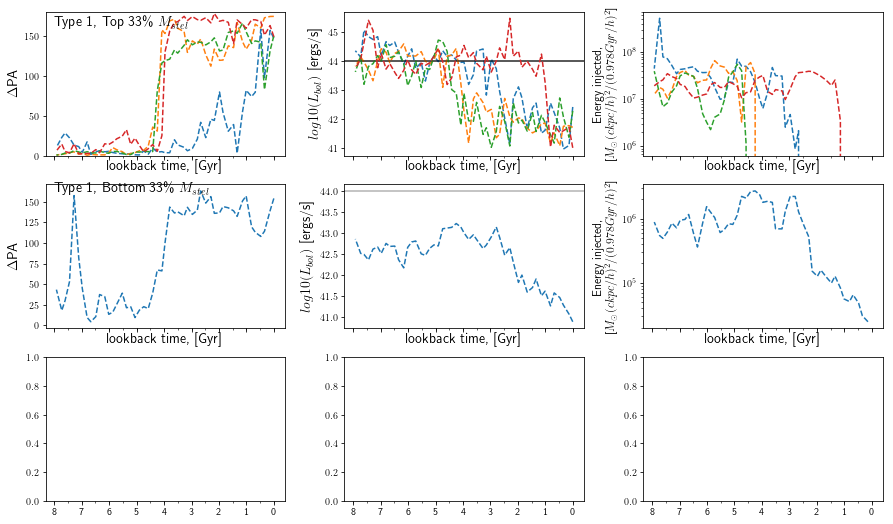

In [122]:
fig, ax = plt.subplots(3,3, figsize=(15, 9),  sharex='all')

ax[0,0].annotate('Type 1, Top 33\% $M_{stel}$', xy=(8, 160), xycoords='data', fontsize=14)
plot_individual_row(return_individual_params(17200), ax[0,:], linestyle='dashed')
plot_individual_row(return_individual_params(200805), ax[0,:], linestyle='dashed')
plot_individual_row(return_individual_params(249167), ax[0,:], linestyle='dashed')
plot_individual_row(return_individual_params(363737), ax[0,:], linestyle='dashed')
ax[0,0].set_ylim([0,180])

ax[1,0].annotate('Type 1, Bottom 33\% $M_{stel}$', xy=(8, 160), xycoords='data', fontsize=14)
plot_individual_row(return_individual_params(645860), ax[1,:], linestyle='dashed')
# plot_individual_row(return_individual_params(175257), ax[1,:], linestyle='dashed')
# plot_individual_row(return_individual_params(108080), ax[1,:], linestyle='dashed')
# plot_individual_row(return_individual_params(352819), ax[1,:], linestyle='dashed')
# ax[1,0].set_ylim([0,180])
#for i in np.unique(counter_tab_LM.root_subfind[]):
#    plot_individual_row(return_individual_params(i), ax[1,:], linestyle='dashed')

# ax[2,0].annotate('SF counter-rots', xy=(8, 170), xycoords='data', fontsize=14)
# for i in np.unique(SF_counter_tab_LM.root_subfind):
#     plot_individual_row(return_individual_params(i), ax[2,:], linestyle='dashed')

ax[0,0].invert_xaxis()
fig.subplots_adjust(wspace=0.25)
plt.show()